## Preprocessamento

### Importando as bibliotecas


In [2]:
import numpy as np # Numpy: biblioteca para manipular vetores e matrizes
import pandas as pd # Pandas: biblioteca para manipular tabelas
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller
from pandas import Series

### Carrregando os dados

In [3]:
itu = pd.read_csv(r'C:\Users\thgcn\OneDrive\Academico\Mestrado - NLP - Finance\Pesquisa\Indicadores economicos\itub.csv', sep=';', header=0, index_col='Data', parse_dates=['Data'], squeeze=True)


In [4]:
itull=itu.drop(columns=['ief','empresa','at','roe','moper'])
ituief=itu.drop(columns=['roe','empresa','LL','at','moper'])
ituat=itu.drop(columns=['ief','empresa','LL','roe','moper'])
ituroe=itu.drop(columns=['ief','empresa','LL','at','moper'])
itumoper=itu.drop(columns=['ief','empresa','LL','at','roe'])
ituplot=itu.drop(columns=['at','moper'])

In [5]:
import pandas_profiling
pandas_profiling.ProfileReport(itu)

<ipython-input-5-634d048270cd>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling
Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


<function matplotlib.pyplot.show(close=None, block=None)>

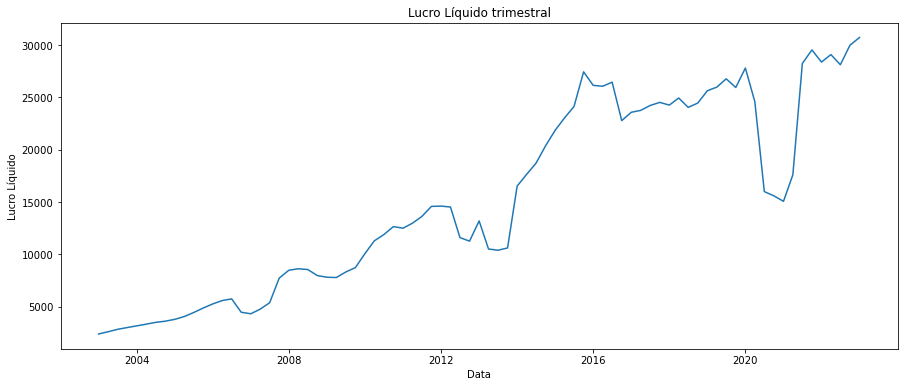

In [6]:
from pandas.plotting import scatter_matrix
plt.plot(itull)
plt.xlabel('Data')
plt.ylabel('Lucro Líquido')
plt.title('Lucro Líquido trimestral')
plt.show

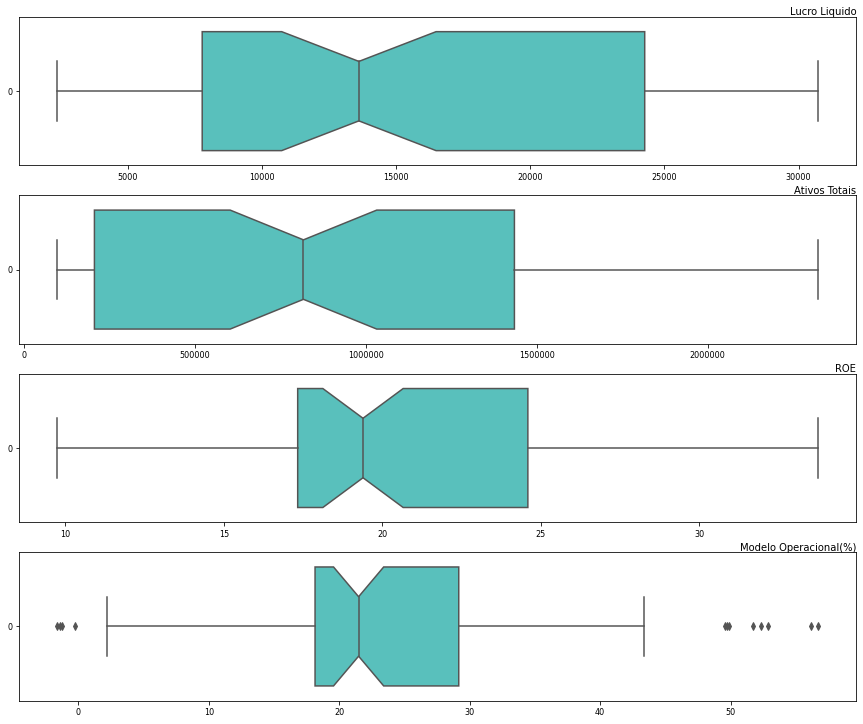

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
def graf_boxplot(coluna, ax, title):
    sns.boxplot(data=coluna, ax=ax, notch=True,
                orient='h', color='mediumturquoise')
    ax.set(xlabel='', ylabel='')
    ax.tick_params(labelsize=8)
    ax.ticklabel_format(style='plain', axis='x')
    ax.set_title(title, loc='right', fontsize=10, pad=-10)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(15, 10))
graf_boxplot(itu['LL'], ax1, 'Lucro Liquido')
graf_boxplot(itu['at'], ax2, 'Ativos Totais')
graf_boxplot(itu['roe'], ax3, 'ROE')
graf_boxplot(itu['moper'], ax4, 'Modelo Operacional(%)')
plt.subplots_adjust(top=1.9, bottom=0.95)
plt.show()

### Médias móveis

##### Teste de estacionariedade

lucro liquido


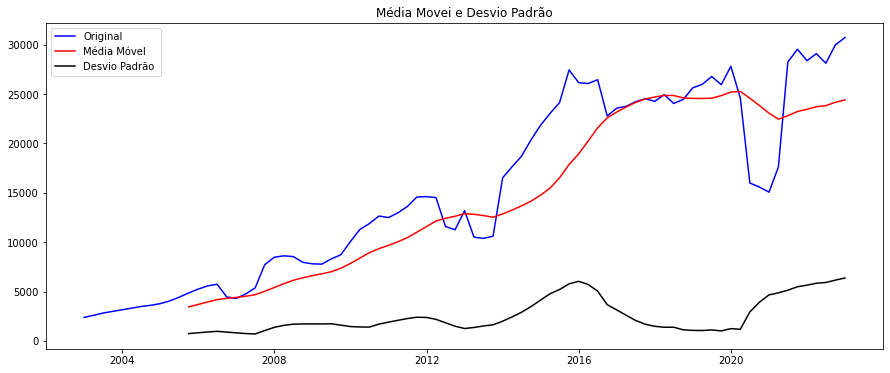

Resultados do Teste de Dickey-Fuller:
Estatística de Teste    -0.542465
valor de p               0.883460
# de intervalos          4.000000
# de observações        76.000000
Valor crítico (1%)      -3.519481
Valor crítico (5%)      -2.900395
Valor crítico (10%)     -2.587498
dtype: float64
ativos totais


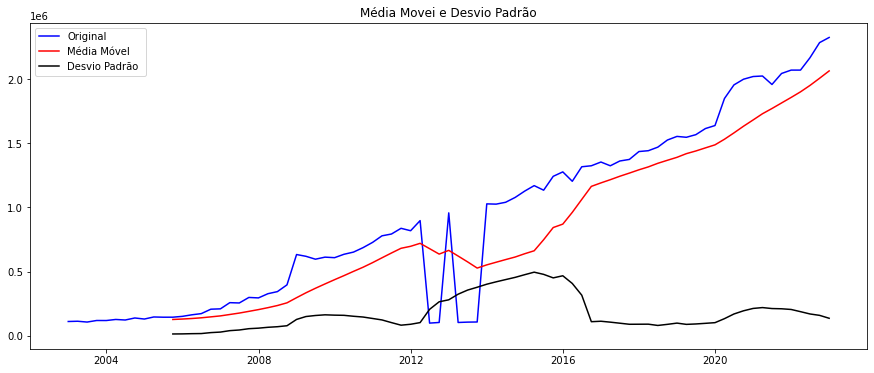

Resultados do Teste de Dickey-Fuller:
Estatística de Teste     0.462391
valor de p               0.983684
# de intervalos          3.000000
# de observações        77.000000
Valor crítico (1%)      -3.518281
Valor crítico (5%)      -2.899878
Valor crítico (10%)     -2.587223
dtype: float64
roe


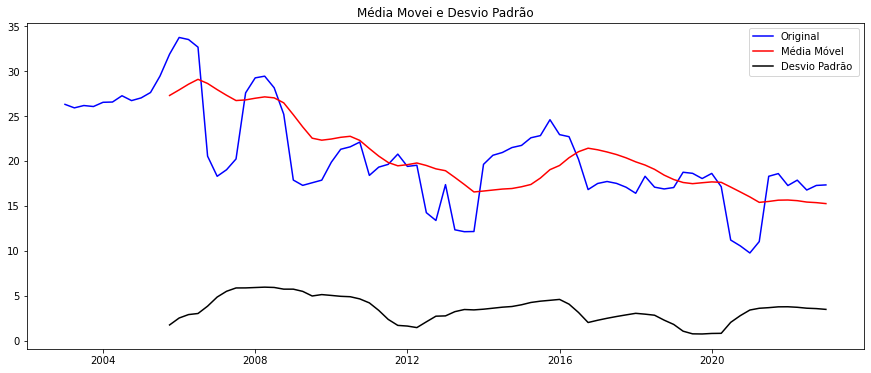

Resultados do Teste de Dickey-Fuller:
Estatística de Teste    -2.900503
valor de p               0.045290
# de intervalos          1.000000
# de observações        79.000000
Valor crítico (1%)      -3.515977
Valor crítico (5%)      -2.898886
Valor crítico (10%)     -2.586694
dtype: float64


In [8]:
#teste de estacionariedade, este é diferente porque vai plotar os resultados
def test_stationarity(timeseries):
    #estatisticas moveis
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #imprime estatisticas moveis
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Média Móvel')
    std = plt.plot(movingSTD, color='black', label = 'Desvio Padrão ')
    plt.legend(loc='best')
    plt.title('Média Movei e Desvio Padrão')
    plt.show(block=False)
    
    #teste de Dickey-Fuller
    print('Resultados do Teste de Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística de Teste', 'valor de p', '# de intervalos', '# de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valor crítico ({})'.format(key)] = value
    print(dfoutput)  
    
print("lucro liquido")
test_stationarity(itull)
print("ativos totais")
test_stationarity(ituat)
print("roe")
test_stationarity(ituroe)


## Lucro Liquido

In [9]:
# variavel de controle q armazena o melhor periodo
optimal_n= None
# melhor metrica encontrada
best_mse= None
# melhor resultado 
db=itu[["LL"]].values.astype('float32')
meresuls=np.zeros(int(len(db)/2-2))

for n in range(3, int(len(db)/2+1)):
    mean_for_n = np.zeros(len(db)-n)
    for i in range(0, len(db)-n):
        mean_for_n[i] = np.power(np.mean(db[:,0][i:i+n]) - db[i + n][0],2)
    meresuls[n -3] = np.mean(mean_for_n)
optimal_n = np.argmin(meresuls) + 3
best_mse = np.min(meresuls)

print("MSE = %s" % meresuls)
print("Melhor MSE = %s" %best_mse)
print("Otimo n = %s" %optimal_n)

MSE = [ 8219421.24672162 10299422.90531036 11845259.68332341 13137612.19945613
 14350835.14844282 15495316.13238185 16548633.3809032  17490762.79260699
 18336600.63261877 19209104.22213364 20126348.92977146 21045207.97742874
 22054716.21302906 23285611.57547659 24704741.44121268 26337215.49063309
 28151744.03861805 29857469.56947096 31541977.48954855 33283531.43670709
 35074851.93360893 37017571.73580256 39077742.66190626 41222227.84413594
 43392851.05557371 45603806.30117438 47741973.73386684 49842857.05943691
 52058395.37364023 54356040.33753471 56994960.11524827 59769681.75653674
 62621736.15873724 65412475.67437156 68384363.71226098 71538496.66055088
 75660588.44445142 80041404.02523525]
Melhor MSE = 8219421.246721619
Otimo n = 3


Ma = 29619.666


<ipython-input-10-ad158f994d57>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(db[:,0], Label = 'Dados originais')
<ipython-input-10-ad158f994d57>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(forecast, Label = 'Dados originais')


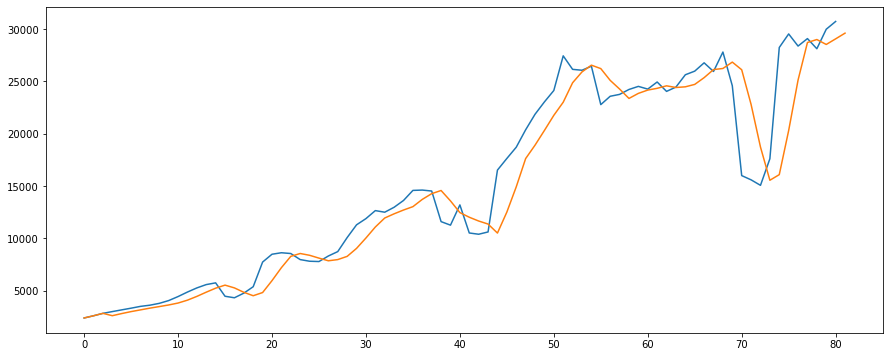

In [10]:
db=itu[["LL"]].values.astype('float32')
print("Ma = %s" % np.mean(db[:,0][len(db)-optimal_n:len(db)]))
forecast = np.zeros(len(db)+1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n +1):
    forecast[i+optimal_n] =  np.mean(db[:,0][i:i+optimal_n])
    
plt.plot(db[:,0], Label = 'Dados originais')
plt.plot(forecast, Label = 'Dados originais')
plt.show()

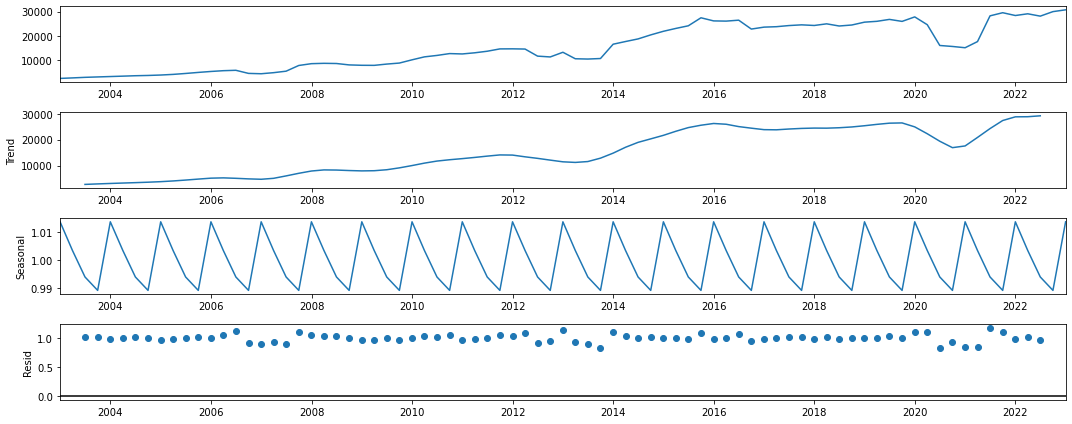

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(itull, model='multiplicative')
result.plot()
plt.show()

## Arima

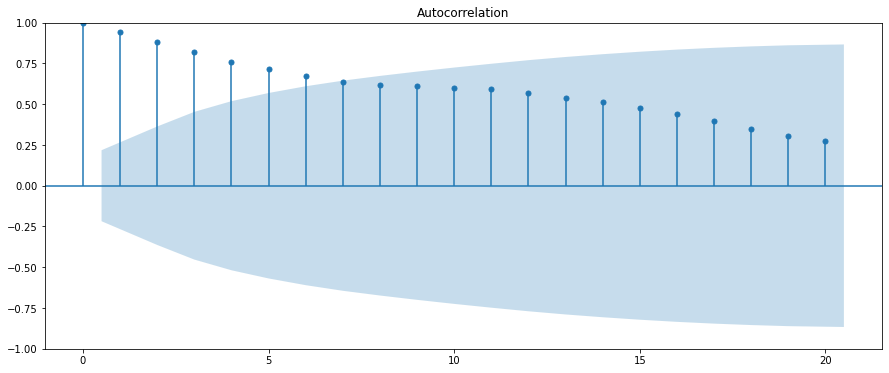

c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


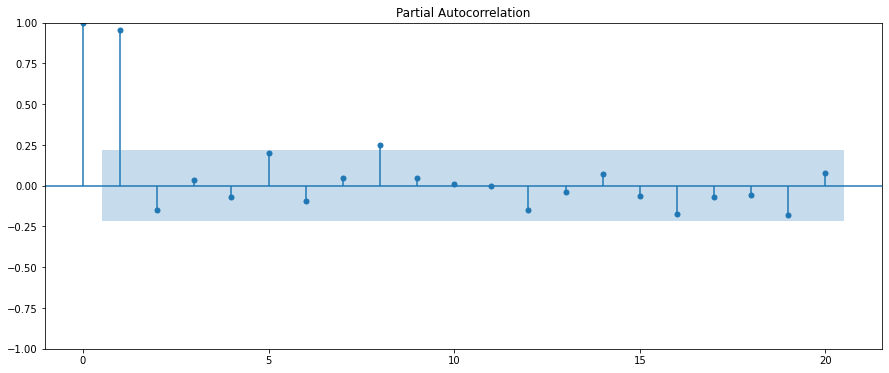

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(itull)
plt.show()
plot_pacf(itull)
plt.show()

In [13]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [14]:
model = sm.tsa.arima.ARIMA(itull, order=(2,2,2))
model_fit=model.fit()
print(model_fit.summary())
#AIC 1441.473 ---> 5,1,0

c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     LL   No. Observations:                   81
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -709.773
Date:                Wed, 12 Apr 2023   AIC                           1429.546
Time:                        09:59:03   BIC                           1441.394
Sample:                    12-31-2002   HQIC                          1434.293
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5526      0.193     -2.865      0.004      -0.931      -0.175
ar.L2          0.0185      0.178      0.104      0.917      -0.330       0.367
ma.L1         -0.1364      0.141     -0.968      0.3

c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=24701.546819, expected=24268.000000
predicted=24788.886111, expected=24947.000000


c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=25217.268607, expected=24049.000000


c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24427.791515, expected=24462.000000
predicted=24788.913861, expected=25639.000000
predicted=26119.768767, expected=25985.000000


c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=26281.761915, expected=26781.000000
predicted=27272.687318, expected=25955.000000
predicted=26123.835723, expected=27813.000000


c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28460.550192, expected=24588.000000


c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=24723.947550, expected=15995.000000
predicted=14209.461923, expected=15589.000000
predicted=15948.934976, expected=15064.000000
predicted=14275.767307, expected=17606.000000


c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=18589.027451, expected=28248.000000
predicted=31391.897364, expected=29544.000000
predicted=28714.783869, expected=28384.000000
predicted=29346.812476, expected=29099.000000
predicted=29020.240159, expected=28128.000000


c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=28450.460906, expected=29994.000000
predicted=30804.290254, expected=30737.000000


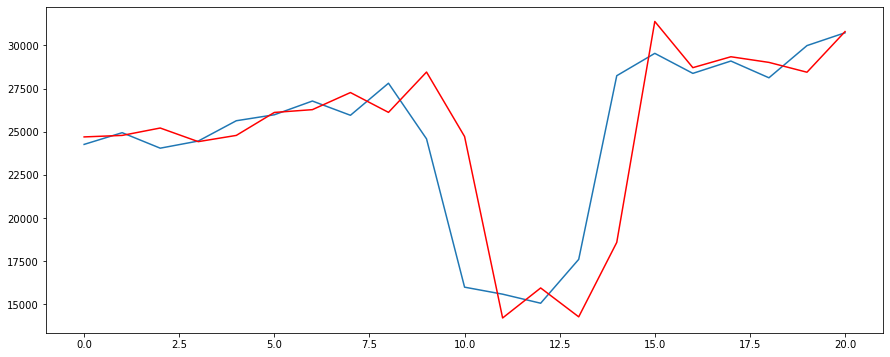

In [15]:
Z=itull.values
size = int(len(Z) * 0.75)
train, test = Z[0:size], Z[size:len(Z)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(2,2,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test, predictions, squared=False)
print("RMSE: ", rmse)


RMSE:  3178.7306635755367


## Ativos totais

In [19]:
# variavel de controle q armazena o melhor periodo
optimal_n= None
# melhor metrica encontrada
best_mse= None
# melhor resultado 
db=itu[["at"]].values.astype('float32')
meresuls=np.zeros(int(len(db)/2-2))

for n in range(3, int(len(db)/2+1)):
    mean_for_n = np.zeros(len(db)-n)
    for i in range(0, len(db)-n):
        mean_for_n[i] = np.power(np.mean(db[:,0][i:i+n]) - db[i + n][0],2)
    meresuls[n -3] = np.mean(mean_for_n)
optimal_n = np.argmin(meresuls) + 3
best_mse = np.min(meresuls)

print("MSE = %s" % meresuls)
print("Melhor MSE = %s" %best_mse)
print("Otimo n = %s" %optimal_n)

MSE = [4.12500607e+10 4.25171994e+10 4.83263887e+10 5.63353441e+10
 6.23972155e+10 6.82856631e+10 7.42916271e+10 8.06238021e+10
 8.72244624e+10 9.43213436e+10 1.02178286e+11 1.10261154e+11
 1.18371587e+11 1.26670406e+11 1.35659228e+11 1.44778374e+11
 1.54179093e+11 1.63713996e+11 1.73985714e+11 1.84814105e+11
 1.96136102e+11 2.07843817e+11 2.17586074e+11 2.28659542e+11
 2.41133841e+11 2.54540300e+11 2.69025563e+11 2.84202895e+11
 3.00145183e+11 3.16555925e+11 3.33235133e+11 3.49965121e+11
 3.67355374e+11 3.84994840e+11 4.04432834e+11 4.22461329e+11
 4.45546853e+11 4.69469955e+11]
Melhor MSE = 41250060696.64741
Otimo n = 3


Ma = 2257461.0


<ipython-input-20-b52330ad7830>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(db[:,0], Label = 'Dados originais')
<ipython-input-20-b52330ad7830>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(forecast, Label = 'Dados originais')


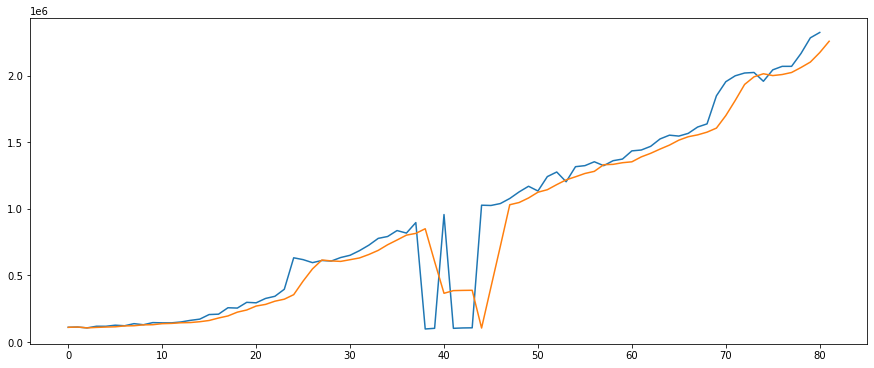

In [20]:
db=itu[["at"]].values.astype('float32')
print("Ma = %s" % np.mean(db[:,0][len(db)-optimal_n:len(db)]))
forecast = np.zeros(len(db)+1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n +1):
    forecast[i+optimal_n] =  np.mean(db[:,0][i:i+optimal_n])
    
plt.plot(db[:,0], Label = 'Dados originais')
plt.plot(forecast, Label = 'Dados originais')
plt.show()

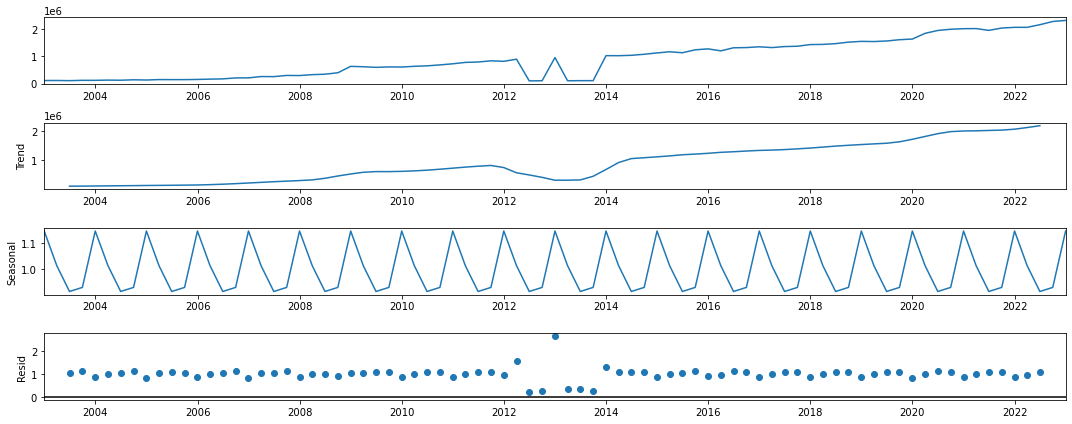

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ituat, model='multiplicative')
result.plot()
plt.show()

### ARIMA

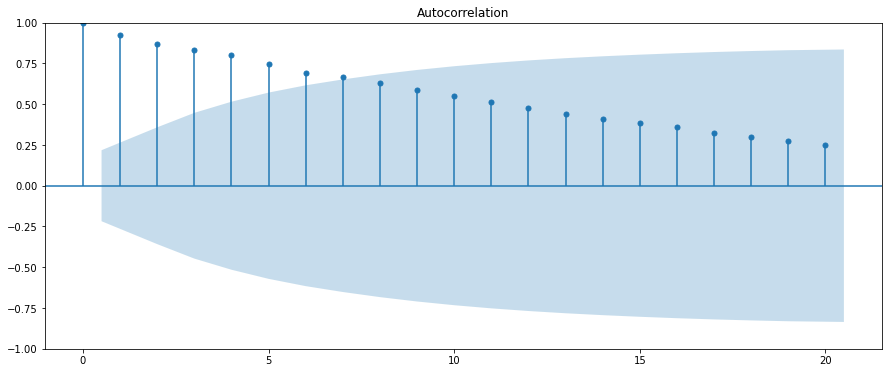

c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


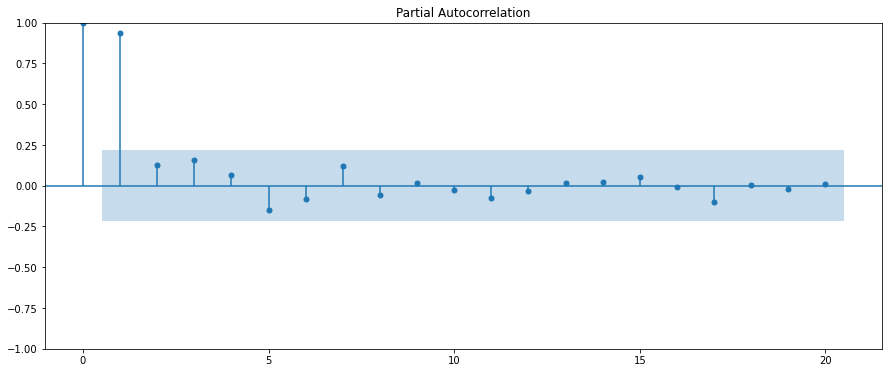

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ituat)
plt.show()
plot_pacf(ituat)
plt.show()

In [23]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [37]:
model = sm.tsa.arima.ARIMA(ituat, order=(2,2,2))
model_fit=model.fit()
print(model_fit.summary())

c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                     at   No. Observations:                   81
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -1073.269
Date:                Wed, 12 Apr 2023   AIC                           2156.539
Time:                        10:07:03   BIC                           2168.386
Sample:                    12-31-2002   HQIC                          2161.285
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0961      0.331     -0.290      0.772      -0.745       0.553
ar.L2         -0.2449      0.166     -1.473      0.141      -0.571       0.081
ma.L1         -1.2429      0.363     -3.420      0.0

predicted=1403673.507334, expected=1434969.000000
predicted=1451237.493591, expected=1441407.000000
predicted=1461826.855387, expected=1469095.000000
predicted=1496654.499589, expected=1524489.000000
predicted=1538612.323155, expected=1552797.000000
predicted=1566750.766928, expected=1545971.000000
predicted=1579387.923160, expected=1566311.000000
predicted=1603176.471997, expected=1613947.000000
predicted=1634679.217753, expected=1637481.000000
predicted=1656072.316171, expected=1848102.000000
predicted=1805855.281778, expected=1954009.000000
predicted=1892816.568367, expected=1998284.000000
predicted=1984955.876612, expected=2019251.000000
predicted=2042414.319361, expected=2023217.000000
predicted=2066400.428524, expected=1957245.000000
predicted=2031385.153903, expected=2043009.000000
predicted=2088339.994002, expected=2069206.000000
predicted=2090623.554687, expected=2069267.000000
predicted=2107860.030606, expected=2165608.000000
predicted=2181653.876235, expected=2283335.000000


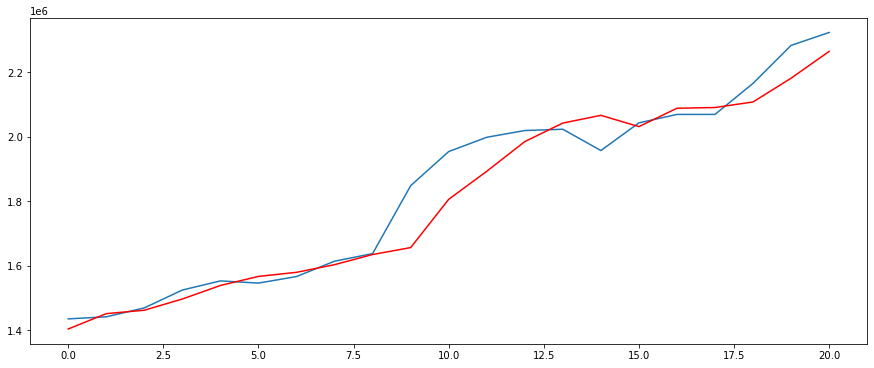

In [38]:
Z=ituat.values
size = int(len(Z) * 0.75)
train, test = Z[0:size], Z[size:len(Z)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(2,2,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test, predictions, squared=False)
print("RMSE: ", rmse)

RMSE:  70479.49667149551


## ROE

In [42]:
# variavel de controle q armazena o melhor periodo
optimal_n= None
# melhor metrica encontrada
best_mse= None
# melhor resultado 
db=itu[["roe"]].values.astype('float32')
meresuls=np.zeros(int(len(db)/2-2))

for n in range(3, int(len(db)/2+1)):
    mean_for_n = np.zeros(len(db)-n)
    for i in range(0, len(db)-n):
        mean_for_n[i] = np.power(np.mean(db[:,0][i:i+n]) - db[i + n][0],2)
    meresuls[n -3] = np.mean(mean_for_n)
optimal_n = np.argmin(meresuls) + 3
best_mse = np.min(meresuls)

print("MSE = %s" % meresuls)
print("Melhor MSE = %s" %best_mse)
print("Otimo n = %s" %optimal_n)


MSE = [13.82607383 16.68942006 18.34178403 18.9616088  18.8992683  18.61741175
 18.41032711 18.62669778 19.01500749 19.29395265 19.2918329  19.23169391
 19.28337445 18.6972028  17.71912795 17.35755986 17.6075791  18.62988592
 19.44332332 20.18345401 20.89597444 21.5903256  20.9209457  20.15048167
 19.57607076 19.12744871 19.22737107 19.54102719 19.88895979 20.35642089
 20.16454445 20.26329347 20.51851654 21.04218703 21.23822923 21.4376141
 19.8131752  17.8239821 ]
Melhor MSE = 13.826073833222182
Otimo n = 3


Ma = 17.12


<ipython-input-43-215e5ccc4167>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(db[:,0], Label = 'Dados originais')
<ipython-input-43-215e5ccc4167>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(forecast, Label = 'Dados originais')


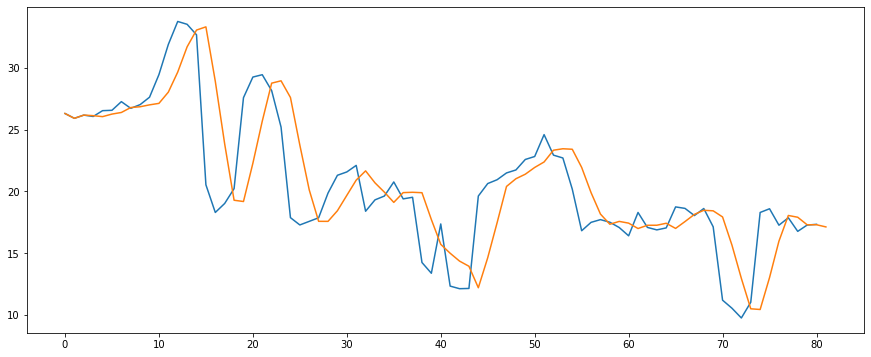

In [43]:
db=itu[["roe"]].values.astype('float32')
print("Ma = %s" % np.mean(db[:,0][len(db)-optimal_n:len(db)]))
forecast = np.zeros(len(db)+1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n +1):
    forecast[i+optimal_n] =  np.mean(db[:,0][i:i+optimal_n])
    
plt.plot(db[:,0], Label = 'Dados originais')
plt.plot(forecast, Label = 'Dados originais')
plt.show()

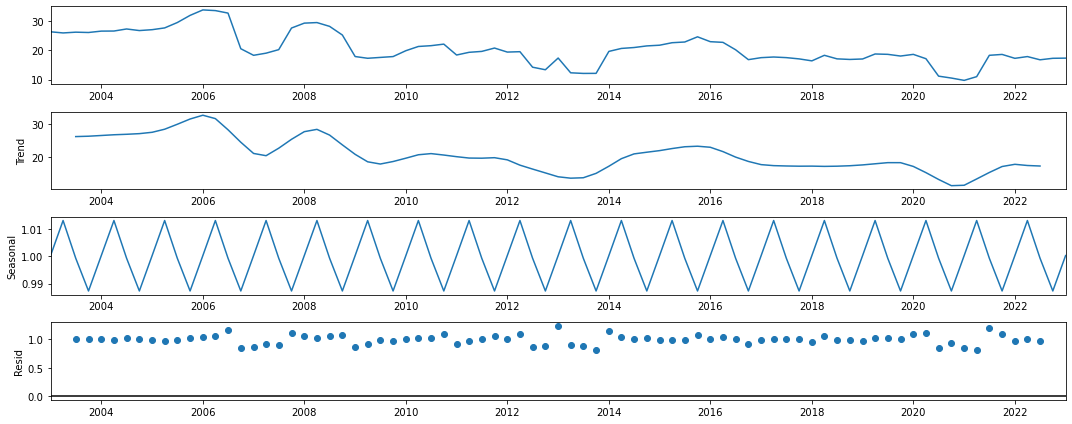

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ituroe, model='multiplicative')
result.plot()
plt.show()


### ARIMA

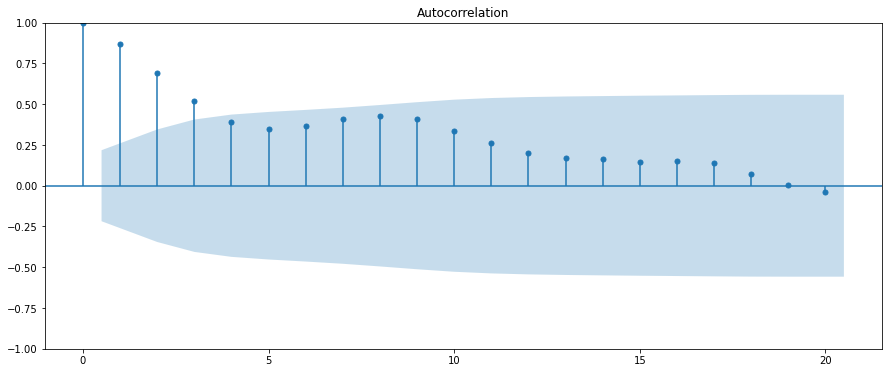

c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


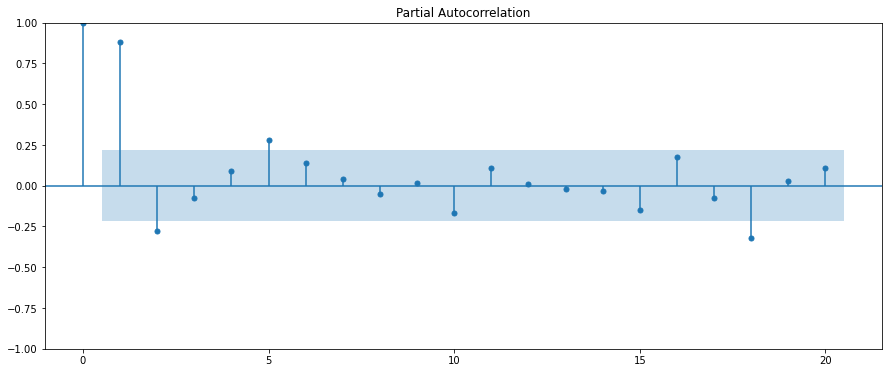

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ituroe)
plt.show()
plot_pacf(ituroe)
plt.show()

In [55]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


model = sm.tsa.arima.ARIMA(ituroe, order=(2,1,2))
model_fit=model.fit()
print(model_fit.summary())


c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    roe   No. Observations:                   81
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -184.623
Date:                Wed, 12 Apr 2023   AIC                            379.247
Time:                        10:18:00   BIC                            391.157
Sample:                    12-31-2002   HQIC                           384.022
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3835      0.364      3.797      0.000       0.669       2.098
ar.L2         -0.6962      0.275     -2.531      0.011      -1.235      -0.157
ma.L1         -1.3065      0.427     -3.060      0.0

c:\Users\thgcn\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=16.677434, expected=16.400000
predicted=16.285261, expected=18.290000
predicted=18.579049, expected=17.080000
predicted=16.503631, expected=16.880000
predicted=16.994672, expected=17.040000
predicted=16.701751, expected=18.740000
predicted=19.318244, expected=18.620000
predicted=18.055539, expected=18.040000
predicted=18.235413, expected=18.610000
predicted=18.290564, expected=17.130000
predicted=16.941262, expected=11.190000
predicted=9.309478, expected=10.540000
predicted=10.985920, expected=9.750000
predicted=8.697866, expected=11.020000
predicted=11.826092, expected=18.290000
predicted=19.175377, expected=18.590000
predicted=18.661548, expected=17.260000
predicted=16.687316, expected=17.860000
predicted=18.223592, expected=16.760000
predicted=16.004811, expected=17.270000
predicted=17.803662, expected=17.330000


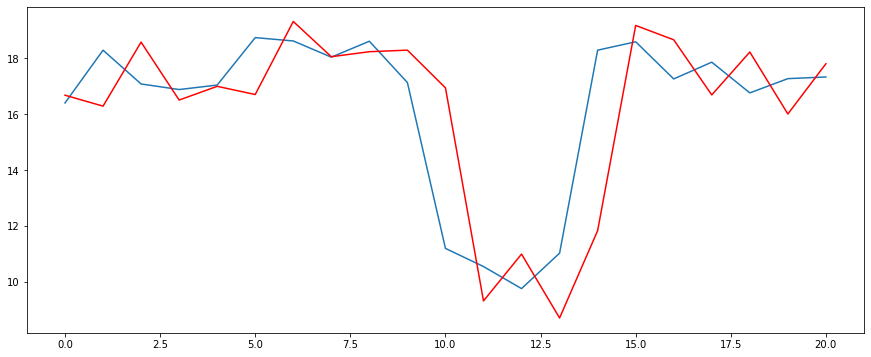

In [56]:
Z=ituroe.values
size = int(len(Z) * 0.75)
train, test = Z[0:size], Z[size:len(Z)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(history, order=(2,2,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test, predictions, squared=False)
print("RMSE: ", rmse)

RMSE:  2.220668390145636
